## Dataset

In [ ]:
# dataset COVID19: https://www.dropbox.com/s/pik0uft1wuqjnpq/Dataset_COVID19.zip?dl=0

!wget  https://www.dropbox.com/s/pik0uft1wuqjnpq/Dataset_COVID19.zip?dl=0

--2023-05-11 08:24:29--  https://www.dropbox.com/s/pik0uft1wuqjnpq/Dataset_COVID19.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pik0uft1wuqjnpq/Dataset_COVID19.zip [following]
--2023-05-11 08:24:30--  https://www.dropbox.com/s/raw/pik0uft1wuqjnpq/Dataset_COVID19.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4281b5541e0ca43f95272fd430.dl.dropboxusercontent.com/cd/0/inline/B71oBrbDnx9LNv6Wkvj9pnPoNEfILG9h5usG_bJjNVKwA_zT1q3iubvMSjPPrusnSq6st2R_OgHxmD86ci0ZTqvfaj2DlK1NRL2M_OXDf0DdhmLtkP_VC9VE9A4QbllNHr0caJEZbcDaDa1_5NRZc4WrZxwMSikDuahuUOI9GreLmQ/file# [following]
--2023-05-11 08:24:30--  https://uc4281b5541e0ca43f95272fd430.dl.dropboxusercontent.com/cd/0/inline/B71oBrbDnx9LNv6Wkvj9pnPoNEfILG9h5usG_bJjNVKwA_zT1q3iub

In [ ]:
!unzip Dataset_COVID19

Archive:  Dataset_COVID19.zip
   creating: Dataset_COVID19/test/
   creating: Dataset_COVID19/test/COVID19/
  inflating: Dataset_COVID19/test/COVID19/COVID19(0).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(1).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(10).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(100).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(101).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(102).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(103).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(104).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(105).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(106).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(107).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(108).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(109).jpg  
  inflating: Dataset_COVID19/test/COVID19/COVID19(11).jpg  
  inflating: Dataset_COVID19/test/COVID19/CO

In [ ]:
TRAIN_PATH = "Dataset_COVID19/train"
TEST_PATH = "Dataset_COVID19/test"

## Import Libraries

In [ ]:
# Common Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import keras
import pickle
import tensorflow as tf
import os
from keras.layers import *
from keras.models import *
from tensorflow.keras.utils import load_img
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

# VGG16 Libraries

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# ResNet Libraries

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# DenseNet Libraries

import random
import cv2
import math
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.optimizers import Adam

## Train and Test data prepration 

In [ ]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2

In [ ]:
# Training data Prepration

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

train_generator = train_datagen.flow_from_directory(
    'Dataset_COVID19/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1842 images belonging to 2 classes.


In [ ]:
# Test data Prepration

In [ ]:
test_dataset = image.ImageDataGenerator(rescale = 1./255)

test_generator = test_dataset.flow_from_directory(
    'Dataset_COVID19/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 634 images belonging to 2 classes.


Defining Callbacks

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model_CNN_COVID.h5', verbose=1, save_best_only=True)

## CNN_2D Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
CNN_COVID = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 30,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks = [anne]
)

<ipython-input-12-013cb9d71277>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CNN_COVID = model.fit_generator(


Epoch 1/30
58/58 [==============================] - 110s 2s/step - loss: 0.4515 - accuracy: 0.8208 - val_loss: 0.1704 - val_accuracy: 0.9527 - lr: 0.0010
Epoch 2/30
58/58 [==============================] - 98s 2s/step - loss: 0.2229 - accuracy: 0.9191 - val_loss: 0.1918 - val_accuracy: 0.9637 - lr: 0.0010
Epoch 3/30
58/58 [==============================] - 99s 2s/step - loss: 0.1732 - accuracy: 0.9419 - val_loss: 0.2030 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 4/30
58/58 [==============================] - 98s 2s/step - loss: 0.2071 - accuracy: 0.9278 - val_loss: 0.3228 - val_accuracy: 0.9558 - lr: 0.0010
Epoch 5/30
58/58 [==============================] - 97s 2s/step - loss: 0.2066 - accuracy: 0.9294 - val_loss: 0.1630 - val_accuracy: 0.9369 - lr: 0.0010
Epoch 6/30
58/58 [==============================] - 98s 2s/step - loss: 0.1648 - accuracy: 0.9446 - val_loss: 0.1435 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 7/30
58/58 [==============================] - 97s 2s/step - loss: 0.1705 - 

In [ ]:
#model.save('model_CNN_COVID.h5')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


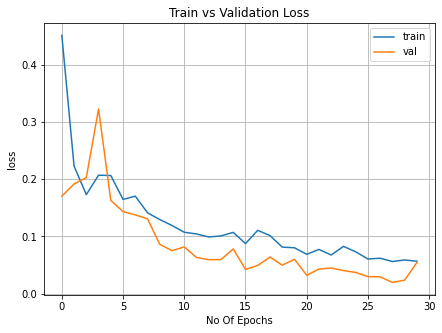

In [ ]:
train_loss_CNN = CNN_COVID.history['loss']
val_loss_CNN = CNN_COVID.history['val_loss']
acc_CNN = CNN_COVID.history['accuracy']
val_acc_CNN = CNN_COVID.history['val_accuracy']
xc = range(30)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_CNN)
plt.plot(xc,val_loss_CNN)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('Train vs Validation Loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['default'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


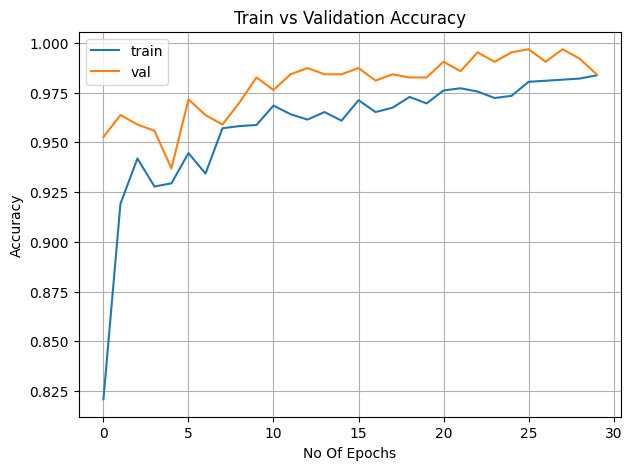

In [ ]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,acc_CNN)
plt.plot(xc,val_acc_CNN)
plt.xlabel('No Of Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['default'])
print(plt.style.available)

In [ ]:
predictions = model.predict_generator(test_generator)
y_pred = np.argmax(predictions, axis= 1)
true_class = test_generator.classes

class_lables = list(test_generator.class_indices.keys())

print(confusion_matrix(test_generator.classes, y_pred))

report = classification_report(true_class, y_pred, target_names= class_lables)
print(report)

<ipython-input-16-acee9910fd8c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


[[158 159]
 [149 168]]
              precision    recall  f1-score   support

     COVID19       0.51      0.50      0.51       317
      NORMAL       0.51      0.53      0.52       317

    accuracy                           0.51       634
   macro avg       0.51      0.51      0.51       634
weighted avg       0.51      0.51      0.51       634



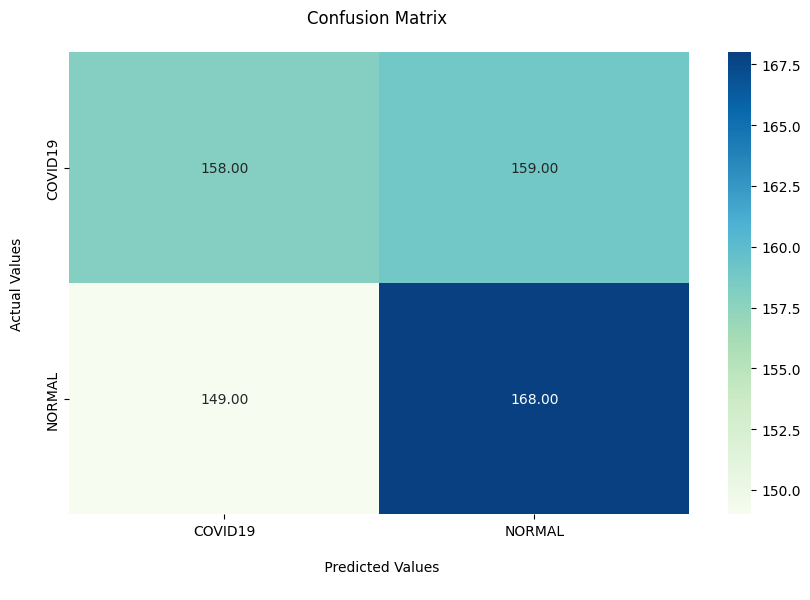

In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(10,6))
fx=sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['COVID19','NORMAL'])
fx.yaxis.set_ticklabels(['COVID19','NORMAL'])
plt.show()

In [ ]:
img_path = "Dataset_COVID19/test/COVID19/COVID19(460).jpg"
img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img)
img = img/255
img = np.expand_dims(img, axis=0)

preds= model.predict(img)
print(preds)

1/1 [==============================] - 0s 285ms/step
[[0.85371995 0.14627998]]


In [ ]:
model

## VGG16 Model

In [ ]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

prediction = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
VGG16_COVID = model.fit(
  train_generator,
  validation_data=test_generator,
  epochs=30,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),
  callbacks = [anne]
)

Epoch 1/30
58/58 [==============================] - 128s 2s/step - loss: 0.1612 - accuracy: 0.9408 - val_loss: 0.0938 - val_accuracy: 0.9574 - lr: 0.0010
Epoch 2/30
58/58 [==============================] - 109s 2s/step - loss: 0.0316 - accuracy: 0.9886 - val_loss: 0.0730 - val_accuracy: 0.9637 - lr: 0.0010
Epoch 3/30
58/58 [==============================] - 109s 2s/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0207 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 4/30
58/58 [==============================] - 110s 2s/step - loss: 0.0148 - accuracy: 0.9962 - val_loss: 0.0589 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 5/30
58/58 [==============================] - 127s 2s/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.0214 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 6/30
58/58 [==============================] - 108s 2s/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0257 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 7/30
58/58 [==============================] - 108s 2s/step - loss: 0.0

In [ ]:
VGG16_COVID.history

{'loss': [0.1612478792667389,
  0.031646404415369034,
  0.014800000935792923,
  0.014794639311730862,
  0.016456881538033485,
  0.012308846227824688,
  0.006734487134963274,
  0.014866293407976627,
  0.017514178529381752,
  0.009065770544111729,
  0.0053762830793857574,
  0.0074689872562885284,
  0.013355212286114693,
  0.0018995009595528245,
  0.009686559438705444,
  0.0026124895084649324,
  0.009621712379157543,
  0.0016335429390892386,
  0.0018975605489686131,
  0.0041540032252669334,
  0.0012008314952254295,
  0.0013176356442272663,
  0.00154768000356853,
  0.0015589240938425064,
  0.004907572641968727,
  0.007792345248162746,
  0.005003631114959717,
  0.0014346942771226168,
  0.003445347771048546,
  0.007489948067814112],
 'accuracy': [0.9408251643180847,
  0.9885993599891663,
  0.9967426657676697,
  0.9961997866630554,
  0.9951140284538269,
  0.9961997866630554,
  0.9994571208953857,
  0.9951140284538269,
  0.9929424524307251,
  0.9972855448722839,
  0.9989142417907715,
  0.99782

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


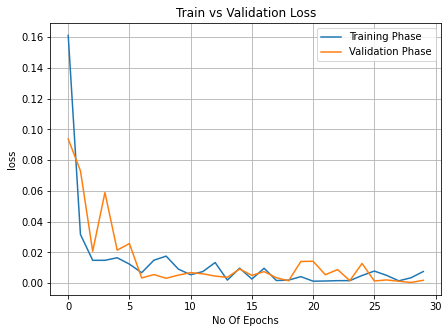

In [ ]:
train_loss_VGG = VGG16_COVID.history['loss']
val_loss_VGG = VGG16_COVID.history['val_loss']
acc_VGG = VGG16_COVID.history['accuracy']
val_acc_VGG = VGG16_COVID.history['val_accuracy']
xc = range(30)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_VGG)
plt.plot(xc,val_loss_VGG)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('Train vs Validation Loss')
plt.grid(True)
plt.legend(['Training Phase','Validation Phase'])
plt.style.use(['default'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


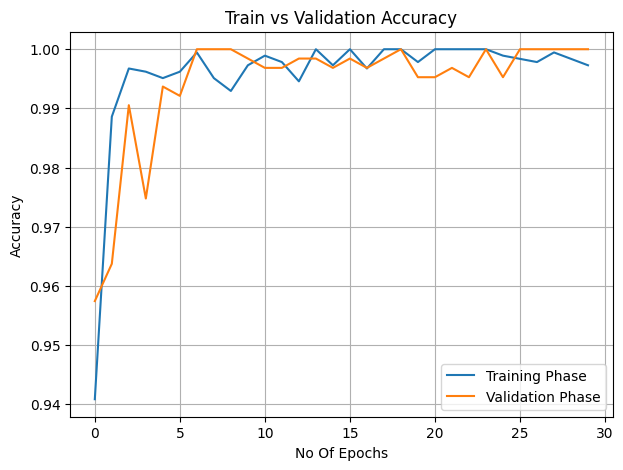

In [ ]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,acc_VGG)
plt.plot(xc,val_acc_VGG)
plt.xlabel('No Of Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.grid(True)
plt.legend(['Training Phase','Validation Phase'])
plt.style.use(['default'])
print(plt.style.available)

In [ ]:
predictions = model.predict_generator(test_generator)
y_pred = np.argmax(predictions, axis= 1)
true_class = test_generator.classes

class_lables = list(test_generator.class_indices.keys())

print(confusion_matrix(test_generator.classes, y_pred))

report = classification_report(true_class, y_pred, target_names= class_lables)
print(report)

<ipython-input-19-acee9910fd8c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


[[151 166]
 [166 151]]
              precision    recall  f1-score   support

     COVID19       0.48      0.48      0.48       317
      NORMAL       0.48      0.48      0.48       317

    accuracy                           0.48       634
   macro avg       0.48      0.48      0.48       634
weighted avg       0.48      0.48      0.48       634



In [ ]:
#model.save('model_VGG16_COVID.h5')

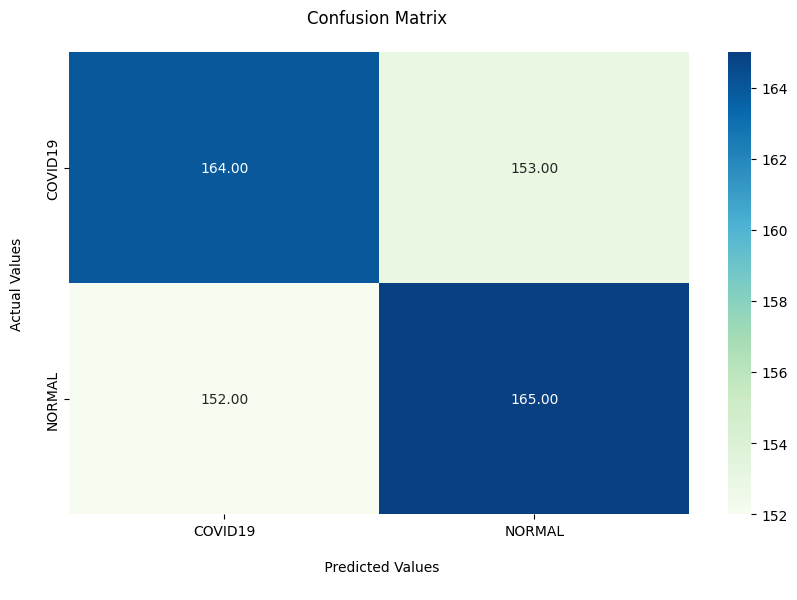

In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(10,6))
fx=sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['COVID19','NORMAL'])
fx.yaxis.set_ticklabels(['COVID19','NORMAL'])
plt.show()

In [ ]:
img_path = "Dataset_COVID19/test/COVID19/COVID19(460).jpg"
img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img)
img = img/255
img = np.expand_dims(img, axis=0)

preds= model.predict(img)
print(preds)

1/1 [==============================] - 1s 699ms/step
[[9.9992824e-01 7.1771850e-05]]


## ResNet 50

In [ ]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 1 Channel, so concating 1.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
x = Flatten() (resnet.output)

In [ ]:
prediction = Dense(2, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
ResNet_COVID = model.fit_generator(
    train_generator,
    validation_data = test_generator,
    epochs = 30,
    steps_per_epoch = len(train_generator),
    validation_steps = len(test_generator),
    callbacks = [anne]
)

<ipython-input-40-18a0fc0170b5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  ResNet_COVID = model.fit_generator(


Epoch 1/30
58/58 [==============================] - 103s 2s/step - loss: 1.8418 - accuracy: 0.6971 - val_loss: 0.2032 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 2/30
58/58 [==============================] - 97s 2s/step - loss: 0.2386 - accuracy: 0.9088 - val_loss: 0.1297 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 3/30
58/58 [==============================] - 96s 2s/step - loss: 0.1818 - accuracy: 0.9278 - val_loss: 0.5437 - val_accuracy: 0.7524 - lr: 0.0010
Epoch 4/30
58/58 [==============================] - 97s 2s/step - loss: 0.1779 - accuracy: 0.9316 - val_loss: 0.0876 - val_accuracy: 0.9685 - lr: 0.0010
Epoch 5/30
58/58 [==============================] - 96s 2s/step - loss: 0.1406 - accuracy: 0.9463 - val_loss: 0.1232 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 6/30
58/58 [==============================] - 97s 2s/step - loss: 0.1519 - accuracy: 0.9435 - val_loss: 0.1757 - val_accuracy: 0.9180 - lr: 0.0010
Epoch 7/30
58/58 [==============================] - 96s 2s/step - loss: 0.1400 - 

In [ ]:
#model.save('model_ResNet50_COVID19.h5')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


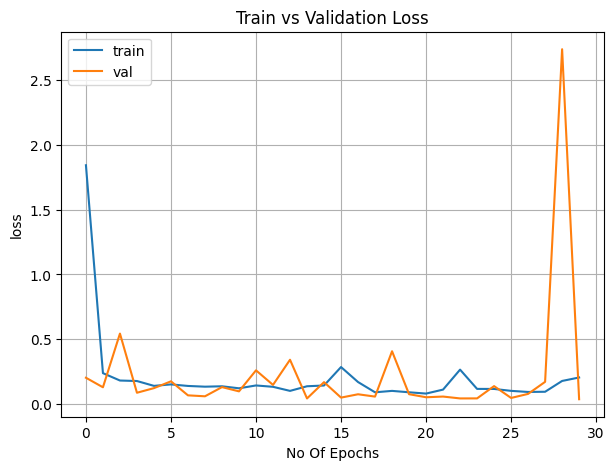

In [ ]:
train_loss_Res = ResNet_COVID.history['loss']
val_loss_Res = ResNet_COVID.history['val_loss']
acc_Res = ResNet_COVID.history['accuracy']
val_acc_Res = ResNet_COVID.history['val_accuracy']
xc = range(30)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_Res)
plt.plot(xc,val_loss_Res)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('Train vs Validation Loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['default'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


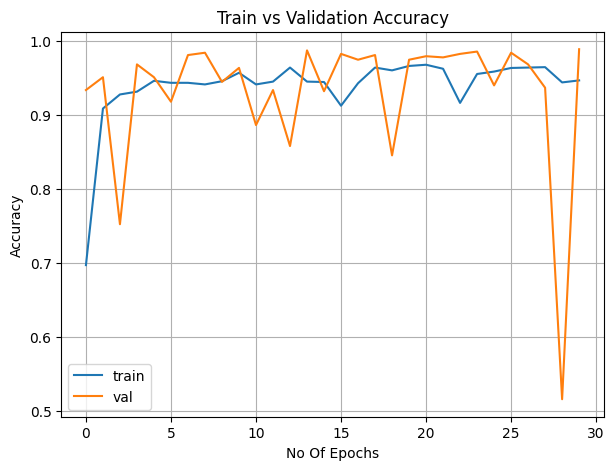

In [ ]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,acc_Res)
plt.plot(xc,val_acc_Res)
plt.xlabel('No Of Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['default'])
print(plt.style.available)

In [ ]:
predictions = model.predict_generator(test_generator)
y_pred = np.argmax(predictions, axis= 1)
true_class = test_generator.classes

class_lables = list(test_generator.class_indices.keys())

print(confusion_matrix(test_generator.classes, y_pred))

report = classification_report(true_class, y_pred, target_names= class_lables)
print(report)

<ipython-input-46-acee9910fd8c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


[[166 151]
 [156 161]]
              precision    recall  f1-score   support

     COVID19       0.52      0.52      0.52       317
      NORMAL       0.52      0.51      0.51       317

    accuracy                           0.52       634
   macro avg       0.52      0.52      0.52       634
weighted avg       0.52      0.52      0.52       634



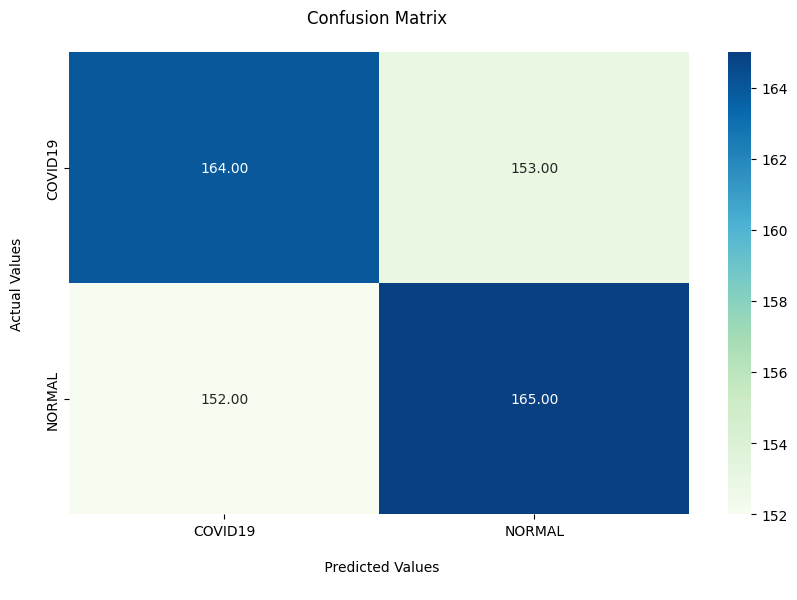

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['COVID19','NORMAL'])
fx.yaxis.set_ticklabels(['COVID19','NORMAL'])
plt.show()

In [ ]:
img_path = "Dataset_COVID19/test/COVID19/COVID19(460).jpg"
img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img)
img = img/255
img = np.expand_dims(img, axis=0)

preds= model.predict(img)
print(preds)

1/1 [==============================] - 1s 1s/step
[[9.9967277e-01 3.2721288e-04]]


## DenseNet121

In [ ]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x)

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model_DenseNet_COVID.h5', verbose=1, save_best_only=True)

In [ ]:
DenseNet_COVID = model.fit_generator(
    train_generator,
    validation_data = test_generator,
    epochs = 30,
    steps_per_epoch = len(train_generator),
    validation_steps = len(test_generator),
    callbacks = [anne,checkpoint]
)

<ipython-input-77-c947d1c2ec46>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  DenseNet_COVID = model.fit_generator(


Epoch 1/30
58/58 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9859
Epoch 1: val_loss did not improve from 0.00249
58/58 [==============================] - 101s 2s/step - loss: 0.0420 - accuracy: 0.9859 - val_loss: 0.0051 - val_accuracy: 0.9984 - lr: 0.0010
Epoch 2/30
58/58 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9924
Epoch 2: val_loss did not improve from 0.00249
58/58 [==============================] - 99s 2s/step - loss: 0.0220 - accuracy: 0.9924 - val_loss: 0.0166 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 3/30
58/58 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9929
Epoch 3: val_loss did not improve from 0.00249
58/58 [==============================] - 97s 2s/step - loss: 0.0326 - accuracy: 0.9929 - val_loss: 0.0851 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 4/30
58/58 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.9913
Epoch 4: val_loss did not improve from 0.00249
58/58 [==

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


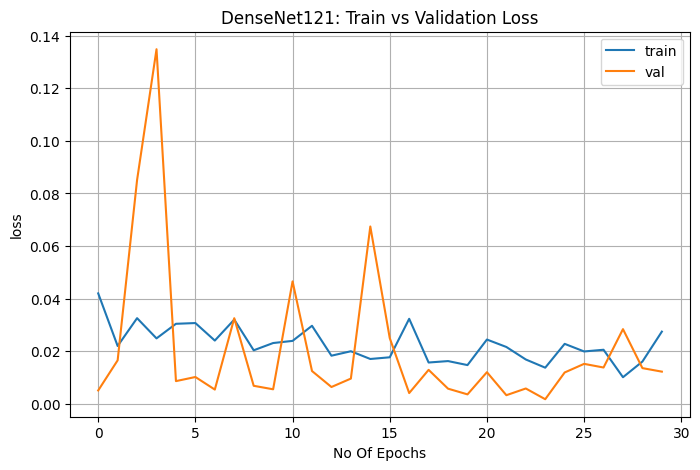

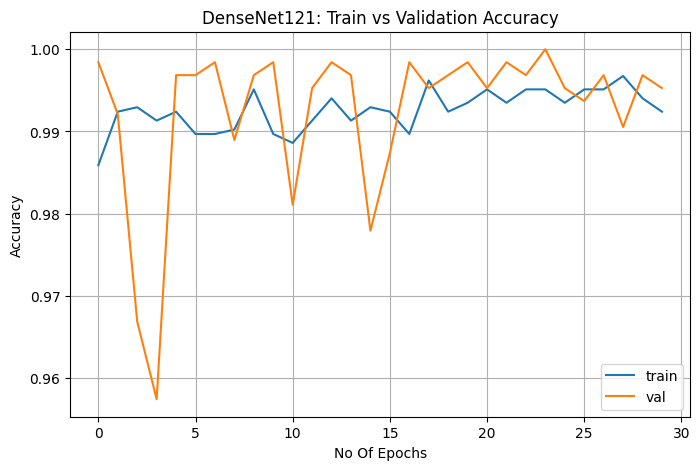

In [ ]:
train_loss_Den = DenseNet_COVID.history['loss']
val_loss_Den = DenseNet_COVID.history['val_loss']
acc_Den = DenseNet_COVID.history['accuracy']
val_acc_Den = DenseNet_COVID.history['val_accuracy']
xc = range(30)

plt.figure(1,figsize=(8,5))
plt.plot(xc,train_loss_Den)
plt.plot(xc,val_loss_Den)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('DenseNet121: Train vs Validation Loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available)

plt.figure(2,figsize=(8,5))
plt.plot(xc,acc_Den)
plt.plot(xc,val_acc_Den)
plt.xlabel('No Of Epochs')
plt.ylabel('Accuracy')
plt.title('DenseNet121: Train vs Validation Accuracy')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['default'])
print(plt.style.available)

In [ ]:
predictions = model.predict_generator(test_generator)
y_pred = np.argmax(predictions, axis= 1)
true_class = test_generator.classes

class_lables = list(test_generator.class_indices.keys())

print(confusion_matrix(test_generator.classes, y_pred))

report = classification_report(true_class, y_pred, target_names= class_lables)
print(report)

<ipython-input-79-acee9910fd8c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


[[159 158]
 [155 162]]
              precision    recall  f1-score   support

     COVID19       0.51      0.50      0.50       317
      NORMAL       0.51      0.51      0.51       317

    accuracy                           0.51       634
   macro avg       0.51      0.51      0.51       634
weighted avg       0.51      0.51      0.51       634



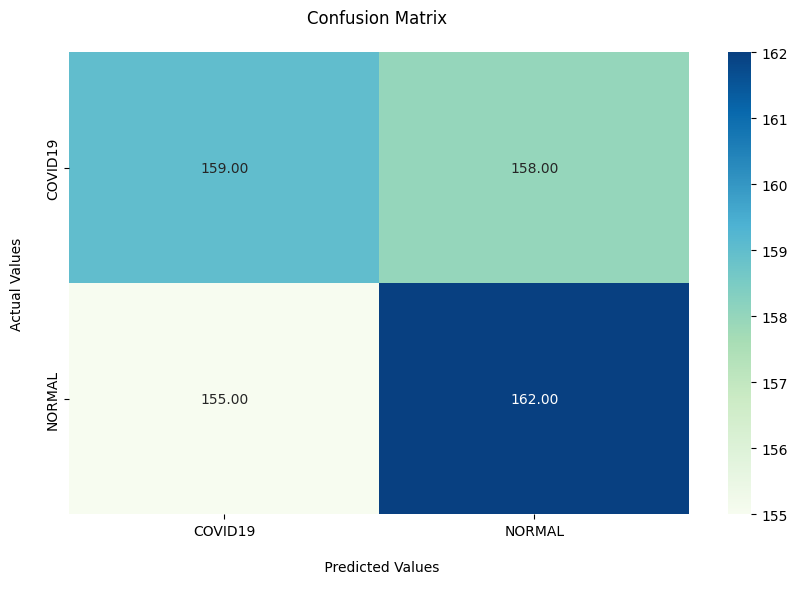

In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(10,6))
fx=sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['COVID19','NORMAL'])
fx.yaxis.set_ticklabels(['COVID19','NORMAL'])
plt.show()

In [ ]:
img_path = "Dataset_COVID19/test/COVID19/COVID19(460).jpg"
img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img)
img = img/255
img = np.expand_dims(img, axis=0)

preds= model.predict(img)
print(preds)

1/1 [==============================] - 0s 29ms/step
[[1.0000000e+00 4.0815962e-08]]


## Comparative Analysis

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


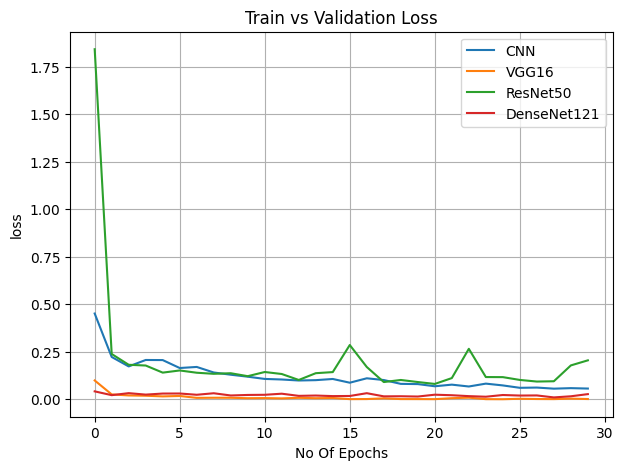

In [ ]:
xc = range(30)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_CNN)
plt.plot(xc,train_loss_VGG)
plt.plot(xc,train_loss_Res)
plt.plot(xc,train_loss_Den)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('Train vs Validation Loss')
plt.grid(True)
plt.legend(['CNN','VGG16','ResNet50','DenseNet121'])
plt.style.use(['default'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


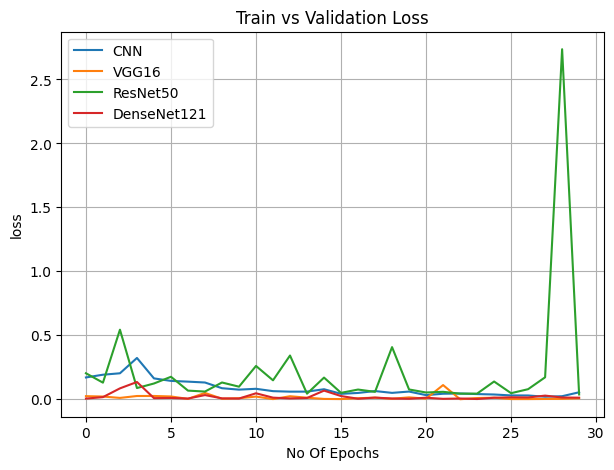

In [ ]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,val_loss_CNN)
plt.plot(xc,val_loss_VGG)
plt.plot(xc,val_loss_Res)
plt.plot(xc,val_loss_Den)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('Train vs Validation Loss')
plt.grid(True)
plt.legend(['CNN','VGG16','ResNet50','DenseNet121'])
plt.style.use(['default'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


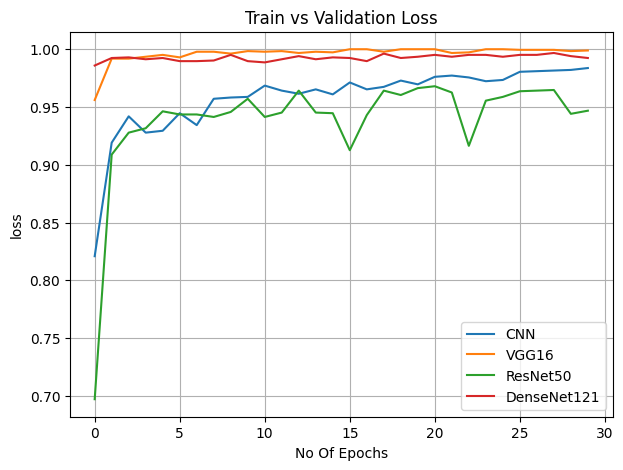

In [ ]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,acc_CNN)
plt.plot(xc,acc_VGG)
plt.plot(xc,acc_Res)
plt.plot(xc,acc_Den)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('Train vs Validation Loss')
plt.grid(True)
plt.legend(['CNN','VGG16','ResNet50','DenseNet121'])
plt.style.use(['default'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


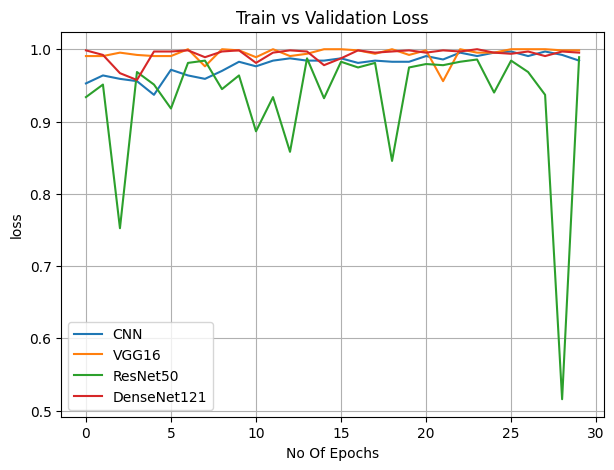

In [ ]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,val_acc_CNN)
plt.plot(xc,val_acc_VGG)
plt.plot(xc,val_acc_Res)
plt.plot(xc,val_acc_Den)
plt.xlabel('No Of Epochs')
plt.ylabel('loss')
plt.title('Train vs Validation Loss')
plt.grid(True)
plt.legend(['CNN','VGG16','ResNet50','DenseNet121'])
plt.style.use(['default'])
print(plt.style.available)

In [ ]:
CNN_COVID.history

{'loss': [0.45149391889572144,
  0.2229265719652176,
  0.17316070199012756,
  0.20709921419620514,
  0.20655454695224762,
  0.16479283571243286,
  0.17047010362148285,
  0.14131353795528412,
  0.1295996755361557,
  0.11917697638273239,
  0.10737992078065872,
  0.10443520545959473,
  0.09914545714855194,
  0.10095889866352081,
  0.10716467350721359,
  0.08755118399858475,
  0.11075718700885773,
  0.10158131271600723,
  0.08144346624612808,
  0.08025522530078888,
  0.06881137937307358,
  0.07735585421323776,
  0.06761415302753448,
  0.08269777148962021,
  0.07324425131082535,
  0.06065697968006134,
  0.061981722712516785,
  0.056208156049251556,
  0.05894002690911293,
  0.056769613176584244],
 'accuracy': [0.8208469152450562,
  0.9191096425056458,
  0.941910982131958,
  0.9277958869934082,
  0.929424524307251,
  0.9446253776550293,
  0.9343105554580688,
  0.9571118354797363,
  0.9581975936889648,
  0.9587404727935791,
  0.9685124754905701,
  0.9641693830490112,
  0.9614549279212952,
  0.

In [ ]:
VGG16_COVID.history

{'loss': [0.0993930920958519,
  0.026015179231762886,
  0.020532341673970222,
  0.019069772213697433,
  0.015554160811007023,
  0.017807770520448685,
  0.007762642111629248,
  0.008432414382696152,
  0.00824788399040699,
  0.005981994327157736,
  0.006586795672774315,
  0.005047789309173822,
  0.008032242767512798,
  0.005968326702713966,
  0.0071115815080702305,
  0.0011345453094691038,
  0.0015842842403799295,
  0.005194011144340038,
  0.0014847328420728445,
  0.0013529318384826183,
  0.0010204202262684703,
  0.006102867890149355,
  0.008769127540290356,
  0.0010519683128222823,
  0.0006623867666348815,
  0.00296860933303833,
  0.0017497724620625377,
  0.0012931674718856812,
  0.00370982987806201,
  0.0016702793072909117],
 'accuracy': [0.9560260772705078,
  0.9918566942214966,
  0.9918566942214966,
  0.9934853315353394,
  0.9951140284538269,
  0.9929424524307251,
  0.9978284239768982,
  0.9978284239768982,
  0.9961997866630554,
  0.9983713626861572,
  0.9978284239768982,
  0.9983713

In [ ]:
ResNet_COVID.history

{'loss': [1.8417719602584839,
  0.23860926926136017,
  0.18180441856384277,
  0.17793233692646027,
  0.140586718916893,
  0.15193860232830048,
  0.14000988006591797,
  0.13432589173316956,
  0.13740286231040955,
  0.1218630000948906,
  0.14381307363510132,
  0.1333256959915161,
  0.1019277274608612,
  0.13757282495498657,
  0.1433754563331604,
  0.28576698899269104,
  0.17014364898204803,
  0.09097465127706528,
  0.10191596299409866,
  0.09110388159751892,
  0.08111245930194855,
  0.11184581369161606,
  0.2657961845397949,
  0.11727213114500046,
  0.11687036603689194,
  0.10211779177188873,
  0.0936218649148941,
  0.09518793970346451,
  0.17850519716739655,
  0.20521233975887299],
 'accuracy': [0.6970683932304382,
  0.9087947607040405,
  0.9277958869934082,
  0.9315961003303528,
  0.9462540745735168,
  0.9435396194458008,
  0.9435396194458008,
  0.9413681030273438,
  0.9457111954689026,
  0.9571118354797363,
  0.9413681030273438,
  0.9451683163642883,
  0.9641693830490112,
  0.94516831

In [ ]:
DenseNet_COVID.history 

{'loss': [0.042023152112960815,
  0.02202853187918663,
  0.03260307013988495,
  0.024921029806137085,
  0.030461378395557404,
  0.030746271833777428,
  0.02408948540687561,
  0.032061461359262466,
  0.020391611382365227,
  0.02315121702849865,
  0.023964425548911095,
  0.02970629557967186,
  0.01833963207900524,
  0.02002757042646408,
  0.0170885156840086,
  0.01772979088127613,
  0.032360758632421494,
  0.015747103840112686,
  0.01628996431827545,
  0.014768325723707676,
  0.02447919175028801,
  0.0216498002409935,
  0.01689773052930832,
  0.013780727051198483,
  0.02283836342394352,
  0.01995040848851204,
  0.0205922219902277,
  0.010156050324440002,
  0.016106950119137764,
  0.027486102655529976],
 'accuracy': [0.9858849048614502,
  0.9923995733261108,
  0.9929424524307251,
  0.9913138151168823,
  0.9923995733261108,
  0.9896851181983948,
  0.9896851181983948,
  0.990227997303009,
  0.9951140284538269,
  0.9896851181983948,
  0.9885993599891663,
  0.9913138151168823,
  0.99402821063

In [ ]:
effnet = Efficient(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

NameError: ignored